In [3]:
# import packages
import pandas as pd
import numpy as np
import sklearn
import sklearn.neighbors
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Question 1(a)

### Checking the dataset

In [4]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("train.csv")

# Read CSV test data file into DataFrame
test_df = pd.read_csv("test.csv")

In [ ]:
train_df.head()

In [105]:
len(train_df)
#  42,000 row, 785 columns (1st = label, rest = pixel)

42000

In [ ]:
test_df.head()

In [107]:
len(test_df)

#  28,000 results (784 columns, no label = Y in the test data!)

28000

In [12]:
# train_df = train_df[(train_df != 0).any(axis=1)]

In [13]:
# train_df

In [110]:
#check null values:
df = train_df.isnull().sum()
df[df!=0]
#no null values!

Series([], dtype: int64)

## Question 1(B):

### Write a function to display an MNIST digit. Display one of each digit

In [5]:
# Split into target and feature variables 
X_train = train_df.drop(columns = ['label'],axis=1)
Y_train = train_df['label']

In [6]:
# Function that returns the plot of each row:

def gen_image(row):
    testImage = (np.array(row, dtype='float')).reshape(28,28)
    plt.imshow(testImage, cmap='gray')
    return plt

In [7]:
#iterating over all row to find the unique digits:

unique_num_indexes = []
unique_num_values = []

for i in range(0, len(train_df)):
    if Y_train[i] not in unique_num_values:
        unique_num_indexes.append(i)
        unique_num_values.append(Y_train[i])
    

In [8]:
#show array of unique indexes
unique_num_indexes.sort()
unique_num_indexes

[0, 1, 3, 6, 7, 8, 10, 11, 16, 21]

In [9]:
#show array of unique values
unique_num_values.sort()
unique_num_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

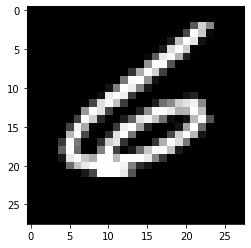

In [10]:
#confirm indeed all numbers 0-9 appear:
gen_image(X_train.iloc[0].to_numpy()) #figure - 1
plt.savefig('number_1_plot')
gen_image(X_train.iloc[1].to_numpy()) #figure - 0
plt.savefig('number_0_plot')
gen_image(X_train.iloc[3].to_numpy()) #figure - 4
plt.savefig('number_4_plot')
gen_image(X_train.iloc[6].to_numpy()) #figure - 7
plt.savefig('number_7_plot')
gen_image(X_train.iloc[7].to_numpy()) #figure - 3
plt.savefig('number_3_plot')
gen_image(X_train.iloc[8].to_numpy()) #figure - 5
plt.savefig('number_5_plot')
gen_image(X_train.iloc[10].to_numpy()) #figure - 8
plt.savefig('number_8_plot')
gen_image(X_train.iloc[11].to_numpy()) #figure - 9
plt.savefig('number_9_plot')
gen_image(X_train.iloc[16].to_numpy()) #figure - 2
plt.savefig('number_2_plot')
gen_image(X_train.iloc[21].to_numpy()) #figure - 6
plt.savefig('number_6_plot')

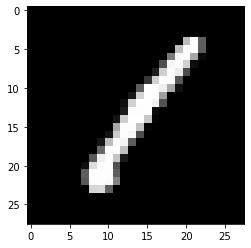

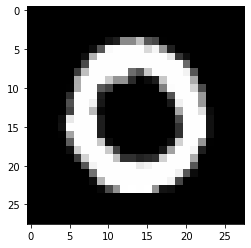

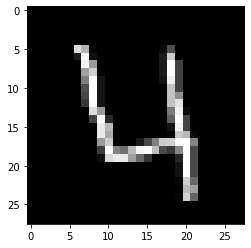

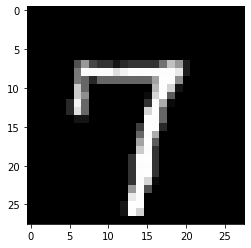

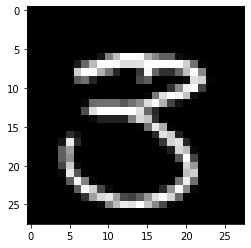

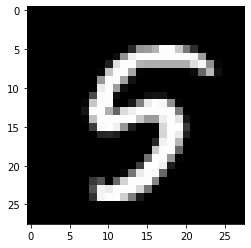

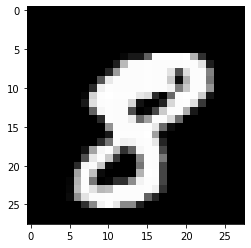

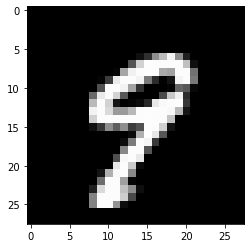

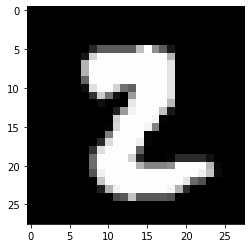

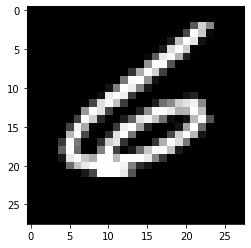

In [11]:
#show all plots according to the indexes:
for x in unique_num_indexes:
    gen_image(X_train.iloc[x].to_numpy()).show()
    
    
#     plt.savefig?

Question 3:

Pick one example of each digit from your training data. Then, for each sample digit, compute
and show the best match (nearest neighbor) between your chosen sample and the rest of
the training data. Use L2 distance between the two images’ pixel values as the metric. This
probably won’t be perfect, so add an asterisk next to the erroneous examples (if any).


In [13]:
def distance(arr):
    min_dist = 100000000
    shortest_index = -1
    for i in range(0, len(train_df)):
        temp_dist = np.linalg.norm(arr - X_train.iloc[i].to_numpy())
        if temp_dist < min_dist and temp_dist != 0:
            min_dist = temp_dist
            shortest_index = i
            
    return min_dist, shortest_index

In [48]:
# function that draws pairs of numbers:
def pair_plots(original_index, shortest_index):
    plt.subplot(331)
    plt.imshow(X_train.iloc[original_index].to_numpy().reshape(28,28), cmap='gray')
    plt.subplot(333)
    plt.imshow(X_train.iloc[shortest_index].to_numpy().reshape(28,28), cmap='gray')
               

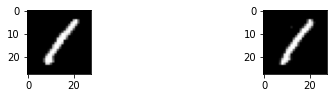

In [44]:
#how would the first number comparison would look like?
pair_plots(0,29704)

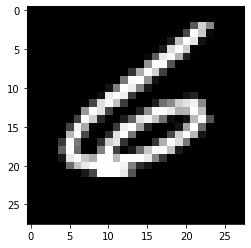

In [42]:
#reminder to how I wrote it
plt.imshow(X_train.iloc[x].to_numpy().reshape(28,28), cmap='gray')

In [33]:
#creating dictionary with the original index that created the number, the minimum distance and the row that gave the minimum distance
shortest_dist_dict = {}
i = 0
for x in unique_num_indexes:
    (min_dist, shortest_index) = distance(X_train.iloc[x].to_numpy())
    shortest_dist_dict[i] = (x, min_dist, shortest_index)
    i+=1;
    
    
#     all_min_dist.append(min_dist)
#     ax1 = gen_image(X_train.iloc[min_dist_x[1]].to_numpy()).show()
#     ax2 = gen_image(X_train.iloc[x].to_numpy()).show()
#     fig, (ax1, ax2) = plt.subplots(1, 2)

In [38]:
#make sure it looks good:
print(shortest_dist_dict)

{0: (0, 489.67948701165744, 29704), 1: (1, 1046.5954328201515, 12950), 2: (3, 1356.8809822530493, 14787), 3: (6, 863.5010133172977, 15275), 4: (7, 1832.6649993929605, 8981), 5: (8, 1066.3676664265472, 30073), 6: (10, 1593.7775879965184, 32586), 7: (11, 910.5767403135224, 35742), 8: (16, 1380.877257398354, 9536), 9: (21, 1446.5113203843239, 16240)}


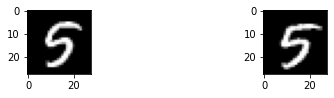

In [51]:
# how does the comparison look like?
pair_plots(shortest_dist_dict[5][0], shortest_dist_dict[5][2])

<ipython-input-48-0b2aa543ca67>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(331)
<ipython-input-48-0b2aa543ca67>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(333)


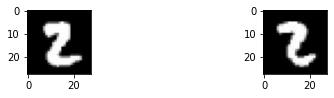

In [52]:
#plot pairs for all 9 numbers:
for i in range(0,9):
    pair_plots(shortest_dist_dict[i][0], shortest_dist_dict[i][2])